In [2]:
from sklearn.datasets import load_digits

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
digits=load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

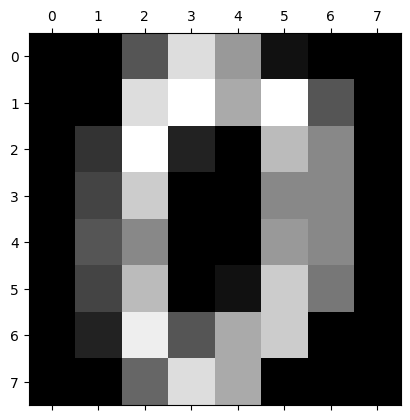

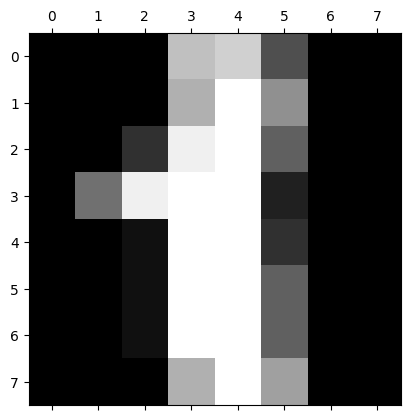

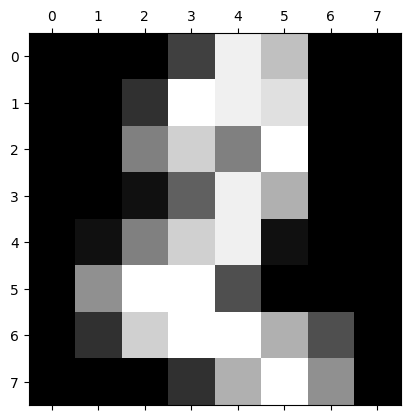

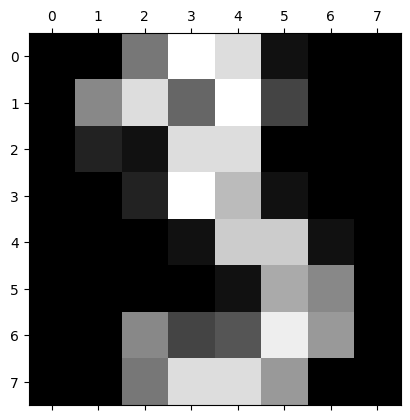

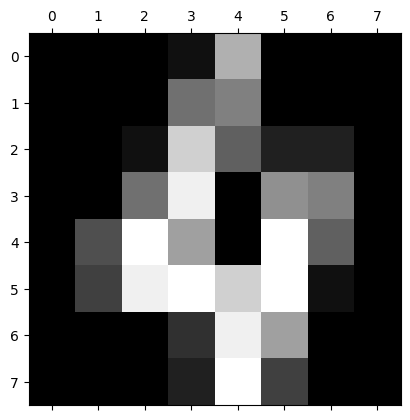

In [6]:
plt.gray()
for i in range(5):
   plt.matshow(digits.images[i])

In [7]:
digits.target[:5]

array([0, 1, 2, 3, 4])

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [73]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)


In [10]:
x_test

array([[ 0.,  0.,  7., ...,  8.,  0.,  0.],
       [ 0.,  0.,  9., ...,  6.,  0.,  0.],
       [ 0.,  1.,  9., ..., 10.,  1.,  0.],
       ...,
       [ 0.,  0.,  6., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  1.,  0.],
       [ 0.,  0.,  9., ...,  3.,  0.,  0.]])

In [11]:
model = LogisticRegression()
model.fit(x_train,y_train)


c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [13]:
model.score(x_test,y_test)

0.975

In [18]:
y_predicted = model.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 38,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  1],
       [ 0,  5,  1,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 36]], dtype=int64)

In [22]:
pip install seaborn



   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 325.1 kB/s eta 0:00:01
   --------------------------------- ------ 245.8/294.9 kB 1.9 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 649.9 kB/s eta 0:00:00


In [23]:

import seaborn as sn

Text(95.72222222222221, 0.5, 'Truth')

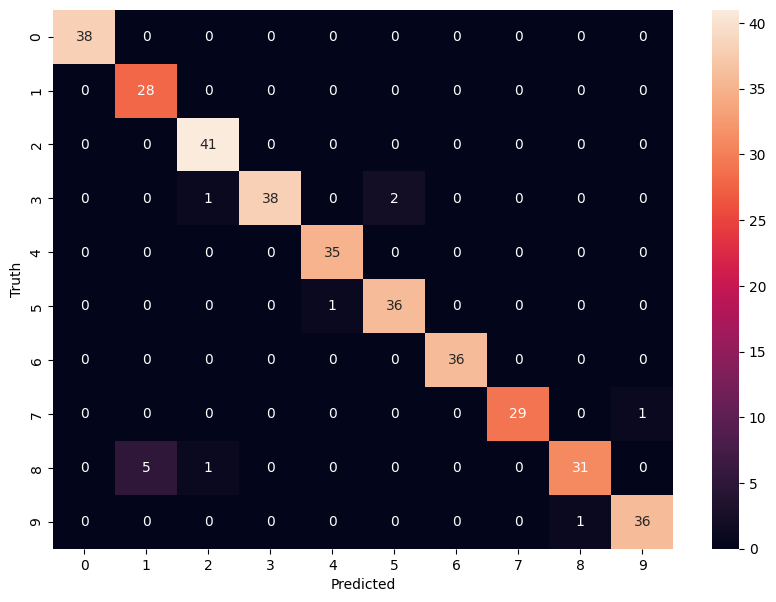

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h2>Random Forest Algorithm</h2>

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
rf.score(x_test,y_test)

0.9777777777777777

<h2> **kFold and cross validation technique**</h2>

In [89]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [90]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic =[]
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    x_train,x_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), x_train, x_test, y_train, y_test))  
    
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), x_train, x_test, y_train, y_test))

In [91]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [92]:
scores_rf

[0.9215358931552587, 0.9415692821368948, 0.9265442404006677]

<h1 style='color:blue;' align='center'>cross val score function</h2>

In [93]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data,digits.target)

array([0.92777778, 0.90277778, 0.94707521, 0.96657382, 0.91643454])